In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('Data_Dictionary.csv')

In [4]:
df

,Variable,Description
0,ID,Client Loan application ID
1,Client_Income,Client Income in $
2,Car_Owned,Any Car owned by client before applying for th...
3,Bike_Owned,Any bike owned by client (0 means No and 1 mea...
4,Active_Loan,Any other active loan at the time of aplicatio...
5,House_Own,Any house owned by client (0 means No and 1 me...
6,Child_Count,Number of children the client has
7,Credit_Amount,Credit amount of the loan in $
8,Loan_Annuity,Loan annuity in $
9,Accompany_Client,Who accompanied the client when client applied...


In [5]:
train_set = pd.read_csv('Train_Dataset.csv')

In [6]:
train_set.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [128]:
df= pd.read_csv('Test_Dataset.csv')

In [129]:
df.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau
0,12202227,11250,0.0,1.0,1.0,1.0,0.0,112500,4474.8,Relative,...,16.0,Yes,Yes,Self-employed,NaN,0.757151,0.629674,0.0515,716.0,2.0
1,12279381,13500,1.0,1.0,1.0,1.0,3.0,49752,3252.15,Alone,...,18.0,No,Yes,Self-employed,NaN,0.342269,NaN,NaN,181.0,NaN
2,12222714,38250,0.0,1.0,0.0,1.0,0.0,67500,3375,Alone,...,19.0,Yes,Yes,Business Entity Type 3,NaN,0.683665,NaN,0.1503,281.0,NaN
3,12265215,20250,0.0,0.0,1.0,0.0,0.0,50849.55,3814.65,Alone,...,20.0,No,No,Medicine,0.351581,0.22995,0.672243,NaN,1442.0,4.0
4,12203970,13500,1.0,1.0,0.0,1.0,0.0,43603.2,2515.95,Alone,...,13.0,Yes,Yes,Self-employed,0.731110,0.566971,0.730987,NaN,927.0,1.0


In [7]:
train_set.isnull().sum()/len(train_set)

ID                            0.000000
Client_Income                 0.029601
Car_Owned                     0.029387
Bike_Owned                    0.029740
Active_Loan                   0.029830
House_Own                     0.030044
Child_Count                   0.029855
Credit_Amount                 0.029806
Loan_Annuity                  0.039489
Accompany_Client              0.014328
Client_Income_Type            0.030372
Client_Education              0.029912
Client_Marital_Status         0.028501
Client_Gender                 0.019802
Loan_Contract_Type            0.029962
Client_Housing_Type           0.030257
Population_Region_Relative    0.039859
Age_Days                      0.029543
Employed_Days                 0.029945
Registration_Days             0.029658
ID_Days                       0.048976
Own_House_Age                 0.657292
Mobile_Tag                    0.000000
Homephone_Tag                 0.000000
Workphone_Working             0.000000
Client_Occupation        

In [8]:
train_set= train_set.drop(['Own_House_Age','Score_Source_1','Social_Circle_Default'],axis=1)

In [130]:
df=df.drop(['Own_House_Age','Score_Source_1','Social_Circle_Default'],axis=1)

In [9]:
train_set.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Score_Source_3,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,6.0,17.0,Yes,Yes,Self-employed,0.478787,NaN,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,3.0,10.0,Yes,Yes,Government,0.215068,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,4.0,NaN,Yes,Yes,Self-employed,0.552795,0.329655,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,2.0,15.0,Yes,Yes,XNA,0.135182,0.631355,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,3.0,NaN,Yes,Yes,Business Entity Type 3,0.301182,0.355639,674.0,1.0,0


In [10]:
train_set['Car_Owned'].unique()

array([ 0.,  1., nan])

In [11]:
train_set['Car_Owned']=train_set['Car_Owned'].astype('str')

In [12]:
train_set['Car_Owned']= train_set['Car_Owned'].replace('nan','0.0')

In [13]:
train_set['Car_Owned']= train_set['Car_Owned'].apply(lambda x:x[0])

In [131]:
df['Car_Owned']=df['Car_Owned'].astype('str')
df['Car_Owned']= df['Car_Owned'].replace('nan','0.0')
df['Car_Owned']= df['Car_Owned'].apply(lambda x:x[0])

In [14]:
train_set['Bike_Owned']=train_set['Bike_Owned'].astype('str')
train_set['Bike_Owned']= train_set['Bike_Owned'].replace('nan','0.0')
train_set['Bike_Owned']= train_set['Bike_Owned'].apply(lambda x:x[0])

In [132]:
df['Bike_Owned']=df['Bike_Owned'].astype('str')
df['Bike_Owned']= df['Bike_Owned'].replace('nan','0.0')
df['Bike_Owned']= df['Bike_Owned'].apply(lambda x:x[0])

In [15]:
train_set['Active_Loan']=train_set['Active_Loan'].astype('str')
train_set['Active_Loan']= train_set['Active_Loan'].replace('nan','0.0')
train_set['Active_Loan']= train_set['Active_Loan'].apply(lambda x:x[0])

In [133]:
df['Active_Loan']=df['Active_Loan'].astype('str')
df['Active_Loan']= df['Active_Loan'].replace('nan','0.0')
df['Active_Loan']= df['Active_Loan'].apply(lambda x:x[0])

In [16]:
train_set['House_Own']=train_set['House_Own'].astype('str')
train_set['House_Own']= train_set['House_Own'].replace('nan','0.0')
train_set['House_Own']= train_set['House_Own'].apply(lambda x:x[0])

In [134]:
df['House_Own']=df['House_Own'].astype('str')
df['House_Own']= df['House_Own'].replace('nan','0.0')
df['House_Own']= df['House_Own'].apply(lambda x:x[0])

In [17]:
train_set['Child_Count']=train_set['Child_Count'].astype('str')
train_set['Child_Count']= train_set['Child_Count'].replace('nan','0.0')
train_set['Child_Count']= train_set['Child_Count'].apply(lambda x:x[0])

In [135]:
df['Child_Count']=df['Child_Count'].astype('str')
df['Child_Count']= df['Child_Count'].replace('nan','0.0')
df['Child_Count']= df['Child_Count'].apply(lambda x:x[0])

In [18]:
train_set.isnull().sum()

ID                                0
Client_Income                  3607
Car_Owned                         0
Bike_Owned                        0
Active_Loan                       0
House_Own                         0
Child_Count                       0
Credit_Amount                  3632
Loan_Annuity                   4812
Accompany_Client               1746
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4857
Age_Days                       3600
Employed_Days                  3649
Registration_Days              3614
ID_Days                        5968
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             41435
Client_Family_Members          2410
Cleint_City_Rating             2409
Application_Process_Day     

In [19]:
train_set['Bike_Owned'].value_counts()

0    82572
1    39284
Name: Bike_Owned, dtype: int64

In [20]:
train_set['Active_Loan'].value_counts()

0    62843
1    59013
Name: Active_Loan, dtype: int64

In [21]:
train_set['House_Own'].value_counts()

1    81798
0    40058
Name: House_Own, dtype: int64

In [22]:
train_set['Child_Count'].value_counts()

0    86472
1    23440
2    10294
3     1430
4      167
5       34
6       12
7        4
8        2
9        1
Name: Child_Count, dtype: int64

In [23]:
train_set['Credit_Amount'].fillna('0',inplace=True)
train_set['Loan_Annuity'].fillna('0',inplace=True)

In [136]:
df['Credit_Amount'].fillna('0',inplace=True)
df['Loan_Annuity'].fillna('0',inplace=True)

In [24]:
train_set['Credit_Amount']=train_set['Credit_Amount'].replace('$','0')

In [137]:
df['Credit_Amount']=df['Credit_Amount'].replace('$','0')

In [25]:
train_set['Loan_Annuity']=train_set['Loan_Annuity'].replace('$','0')

In [138]:
df['Loan_Annuity']=df['Loan_Annuity'].replace('$','0')

In [26]:
train_set['Loan_Annuity']=train_set['Loan_Annuity'].replace('#VALUE!','0')

In [139]:
df['Loan_Annuity']=df['Loan_Annuity'].replace('#VALUE!','0')

In [27]:
train_set['Credit_Amount']=train_set['Credit_Amount'].astype('float')
train_set['Loan_Annuity']=train_set['Loan_Annuity'].astype('float')

In [140]:
df['Credit_Amount']=df['Credit_Amount'].astype('float')
df['Loan_Annuity']=df['Loan_Annuity'].astype('float')

In [28]:
train_set

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Score_Source_3,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0,0,1,0,0,61190.55,3416.85,Alone,...,6.0,17.0,Yes,Yes,Self-employed,0.478787,NaN,63.0,NaN,0
1,12138936,20250,1,0,1,0,0,15282.00,1826.55,Alone,...,3.0,10.0,Yes,Yes,Government,0.215068,NaN,NaN,NaN,0
2,12181264,18000,0,0,1,0,1,59527.35,2788.20,Alone,...,4.0,NaN,Yes,Yes,Self-employed,0.552795,0.329655,277.0,0.0,0
3,12188929,15750,0,0,1,1,0,53870.40,2295.45,Alone,...,2.0,15.0,Yes,Yes,XNA,0.135182,0.631355,1700.0,3.0,0
4,12133385,33750,1,0,1,0,2,133988.40,3547.35,Alone,...,3.0,NaN,Yes,Yes,Business Entity Type 3,0.301182,0.355639,674.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121851,12207714,29250,0,0,0,1,0,107820.00,3165.30,Relative,...,4.0,16.0,Yes,No,Business Entity Type 2,0.173527,0.184116,0.0,1.0,1
121852,12173765,15750,0,1,1,0,0,104256.00,3388.05,Alone,...,4.0,12.0,Yes,Yes,Self-employed,0.371559,0.406617,4.0,0.0,0
121853,12103937,8100,0,1,0,1,1,55107.90,2989.35,Alone,...,5.0,11.0,No,No,Trade: type 6,0.048079,NaN,0.0,NaN,0
121854,12170623,38250,1,1,0,1,0,45000.00,2719.35,Alone,...,1.0,12.0,Yes,Yes,Business Entity Type 3,0.103538,0.0774985,0.0,2.0,0


In [29]:
train_set.isnull().sum()

ID                                0
Client_Income                  3607
Car_Owned                         0
Bike_Owned                        0
Active_Loan                       0
House_Own                         0
Child_Count                       0
Credit_Amount                     0
Loan_Annuity                      0
Accompany_Client               1746
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4857
Age_Days                       3600
Employed_Days                  3649
Registration_Days              3614
ID_Days                        5968
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             41435
Client_Family_Members          2410
Cleint_City_Rating             2409
Application_Process_Day     

In [30]:
train_set['Accompany_Client'].value_counts()

Alone       97409
Relative    15748
Partner      4516
Kids         1334
Others        987
Group         104
##             12
Name: Accompany_Client, dtype: int64

In [31]:
train_set['Accompany_Client']=train_set['Accompany_Client'].replace('##',np.nan)

In [141]:
df['Accompany_Client']=df['Accompany_Client'].replace('##',np.nan)

In [32]:
train_set['Accompany_Client'].mode()

0    Alone
dtype: object

In [33]:
train_set['Accompany_Client'].isnull().value_counts()

False    120098
True       1758
Name: Accompany_Client, dtype: int64

In [34]:
train_set['Accompany_Client'].unique()

array(['Alone', 'Relative', 'Others', 'Kids', nan, 'Partner', 'Group'],
      dtype=object)

In [35]:
train_set['Accompany_Client']=train_set['Accompany_Client'].replace(np.nan,'nan')

In [142]:
df['Accompany_Client']=df['Accompany_Client'].replace(np.nan,'nan')

In [36]:
train_set['Accompany_Client'].isnull().sum()

0

In [37]:
train_set['Accompany_Client']=train_set['Accompany_Client'].replace('nan',train_set['Accompany_Client'].mode())

In [143]:
df['Accompany_Client']=df['Accompany_Client'].replace('nan',train_set['Accompany_Client'].mode())

In [38]:
train_set['Accompany_Client'].value_counts()

Alone       97409
Relative    15748
Partner      4516
nan          1758
Kids         1334
Others        987
Group         104
Name: Accompany_Client, dtype: int64

In [39]:
train_set['Client_Income_Type'].value_counts()

Service            61028
Commercial         27764
Retired            21043
Govt Job            8303
Student                8
Unemployed             6
Maternity leave        2
Businessman            1
Name: Client_Income_Type, dtype: int64

In [40]:
train_set['Client_Income_Type']= train_set['Client_Income_Type'].replace(np.nan,'nan')

In [41]:
train_set['Client_Income_Type']= train_set['Client_Income_Type'].replace('nan',train_set['Client_Income_Type'].mode())

In [42]:
train_set['Client_Education']= train_set['Client_Education'].replace(np.nan,'nan')
train_set['Client_Education']= train_set['Client_Education'].replace('nan',train_set['Client_Education'].mode())

In [43]:
train_set['Client_Marital_Status'].value_counts()

M    87349
S    17404
D     7556
W     6074
Name: Client_Marital_Status, dtype: int64

In [44]:
train_set['Client_Marital_Status']= train_set['Client_Marital_Status'].replace(np.nan,'nan')
train_set['Client_Marital_Status']= train_set['Client_Marital_Status'].replace('nan',train_set['Client_Marital_Status'].mode())

In [45]:
train_set['Population_Region_Relative'].value_counts()

0.035792    4159
0.04622     3444
0.030755    3116
0.025164    3017
0.026392    2967
            ... 
@              6
#              5
0.000938       3
100            1
100.0          1
Name: Population_Region_Relative, Length: 164, dtype: int64

In [46]:
train_set['Client_Gender'].value_counts()

Male      78463
Female    40977
XNA           3
Name: Client_Gender, dtype: int64

In [47]:
train_set['Client_Gender']= train_set['Client_Gender'].replace(np.nan,'nan')
train_set['Client_Gender']= train_set['Client_Gender'].replace('nan',train_set['Client_Gender'].mode())

In [48]:
train_set['Loan_Contract_Type'].value_counts()

CL    107118
RL     11087
Name: Loan_Contract_Type, dtype: int64

In [49]:
train_set['Loan_Contract_Type']= train_set['Loan_Contract_Type'].replace(np.nan,'nan')
train_set['Loan_Contract_Type']= train_set['Loan_Contract_Type'].replace('nan',train_set['Loan_Contract_Type'].mode())

In [50]:
train_set['Client_Housing_Type']= train_set['Client_Housing_Type'].replace(np.nan,'nan')
train_set['Client_Housing_Type']= train_set['Client_Housing_Type'].replace('nan',train_set['Client_Housing_Type'].mode())

In [51]:
train_set=train_set[(train_set['Population_Region_Relative']!= '@' )&(train_set['Population_Region_Relative']!= '#' )]

In [52]:
train_set.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Score_Source_3,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0,0,1,0,0,61190.55,3416.85,Alone,...,6.0,17.0,Yes,Yes,Self-employed,0.478787,NaN,63.0,NaN,0
1,12138936,20250,1,0,1,0,0,15282.00,1826.55,Alone,...,3.0,10.0,Yes,Yes,Government,0.215068,NaN,NaN,NaN,0
2,12181264,18000,0,0,1,0,1,59527.35,2788.20,Alone,...,4.0,NaN,Yes,Yes,Self-employed,0.552795,0.329655,277.0,0.0,0
3,12188929,15750,0,0,1,1,0,53870.40,2295.45,Alone,...,2.0,15.0,Yes,Yes,XNA,0.135182,0.631355,1700.0,3.0,0
4,12133385,33750,1,0,1,0,2,133988.40,3547.35,Alone,...,3.0,NaN,Yes,Yes,Business Entity Type 3,0.301182,0.355639,674.0,1.0,0


In [53]:
train_set['Population_Region_Relative'].value_counts()

0.035792    4159
0.04622     3444
0.030755    3116
0.025164    3017
0.026392    2967
            ... 
0.000938       9
0.000533       6
0.000938       3
100            1
100.0          1
Name: Population_Region_Relative, Length: 162, dtype: int64

In [54]:
train_set['Client_Occupation'].value_counts()

Laborers              21022
Sales                 12136
Core                  10610
Managers               8097
Drivers                7150
High skill tech        4316
Accountants            3766
Medicine               3171
Security               2683
Cooking                2224
Cleaning               1722
Private service        1006
Low-skill Laborers      787
Secretaries             531
Waiters/barmen          511
Realty agents           280
HR                      206
IT                      196
Name: Client_Occupation, dtype: int64

In [55]:
train_set = train_set[train_set['Client_Gender']!='XNA']

In [56]:
train_set.isnull().sum()

ID                                0
Client_Income                  3607
Car_Owned                         0
Bike_Owned                        0
Active_Loan                       0
House_Own                         0
Child_Count                       0
Credit_Amount                     0
Loan_Annuity                      0
Accompany_Client                  0
Client_Income_Type                0
Client_Education                  0
Client_Marital_Status             0
Client_Gender                     0
Loan_Contract_Type                0
Client_Housing_Type               0
Population_Region_Relative     4856
Age_Days                       3600
Employed_Days                  3649
Registration_Days              3614
ID_Days                        5968
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             41430
Client_Family_Members          2410
Cleint_City_Rating             2408
Application_Process_Day     

In [57]:
train_set['Age_Days']=train_set['Age_Days'].replace('x',np.nan)

In [58]:
train_set['Age_Days']= train_set['Age_Days'].astype('float')

In [59]:
train_set['Age_Days']= train_set['Age_Days'].fillna(train_set['Age_Days'].mean())

In [60]:
train_set['Employed_Days']=train_set['Employed_Days'].replace('x',np.nan)
train_set['Employed_Days']= train_set['Employed_Days'].astype('float')
train_set['Employed_Days']= train_set['Employed_Days'].fillna(train_set['Employed_Days'].mean())

In [61]:
train_set['Registration_Days']=train_set['Registration_Days'].replace('x',np.nan)
train_set['Registration_Days']= train_set['Registration_Days'].astype('float')
train_set['Registration_Days']= train_set['Registration_Days'].fillna(train_set['Registration_Days'].mean())

In [62]:
train_set['ID_Days']=train_set['ID_Days'].replace('x',np.nan)
train_set['ID_Days']= train_set['ID_Days'].astype('float')
train_set['ID_Days']= train_set['ID_Days'].fillna(train_set['ID_Days'].mean())

In [63]:
train_set['Client_Family_Members']=train_set['Client_Family_Members'].fillna(train_set['Client_Family_Members'].mean())

In [64]:
train_set['Cleint_City_Rating']=train_set['Cleint_City_Rating'].astype('str')

In [65]:
train_set[train_set['Cleint_City_Rating']=='NaN']

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Score_Source_3,Phone_Change,Credit_Bureau,Default


In [66]:
train_set['Cleint_City_Rating']=train_set['Cleint_City_Rating'].replace(np.nan,'0.0')

In [67]:
train_set['Cleint_City_Rating']=train_set['Cleint_City_Rating'].apply(lambda x:x[0])

In [68]:
train_set['Cleint_City_Rating']=train_set['Cleint_City_Rating'].replace('n','0.0')

In [69]:
train_set['Cleint_City_Rating'].mode()

0    2
dtype: object

In [70]:
train_set['Cleint_City_Rating'].value_counts()

2      88937
3      17042
1      13455
0.0     2408
Name: Cleint_City_Rating, dtype: int64

In [71]:
train_set['Cleint_City_Rating']=train_set['Cleint_City_Rating'].astype('str')

In [74]:
train_set['Cleint_City_Rating']=train_set['Cleint_City_Rating'].replace('0.0','2')

In [75]:
train_set['Cleint_City_Rating']=train_set['Cleint_City_Rating'].astype('int')

In [76]:
train_set['Application_Process_Day']=train_set['Application_Process_Day'].fillna(train_set['Application_Process_Day'].mean())

In [77]:
train_set['Application_Process_Hour']=train_set['Application_Process_Hour'].fillna(train_set['Application_Process_Hour'].mean())

In [78]:
train_set['Type_Organization'].value_counts()

Business Entity Type 3    26278
XNA                       21082
Self-employed             14724
Other                      6290
Medicine                   4317
Business Entity Type 2     4126
Government                 3970
School                     3371
Trade: type 7              2979
Kindergarten               2685
Construction               2623
Business Entity Type 1     2313
Transport: type 4          2076
Trade: type 3              1338
Security                   1284
Industry: type 9           1280
Industry: type 3           1234
Housing                    1161
Military                   1031
Bank                       1012
Agriculture                1011
Industry: type 11           999
Police                      934
Postal                      834
Transport: type 2           810
Security Ministries         756
Trade: type 2               717
Restaurant                  710
Services                    570
University                  559
Transport: type 3           501
Industry

In [79]:
train_set= train_set.drop('Type_Organization',axis=1)

In [80]:
train_set['Score_Source_2'] = train_set['Score_Source_2'].fillna(train_set['Score_Source_2'].mean())

In [81]:
train_set['Score_Source_3'] = train_set['Score_Source_3'].fillna('0')

In [82]:
train_set['Score_Source_3']=train_set['Score_Source_3'].replace('&','0')

In [83]:
train_set['Score_Source_3']=train_set['Score_Source_3'].astype('float')

In [84]:
train_set['Score_Source_3'].mean()

0.3982518379560469

In [85]:
train_set['Score_Source_3']=train_set['Score_Source_3'].astype('str')

In [86]:
train_set['Score_Source_3']= train_set['Score_Source_3'].replace('0','0.39')

In [87]:
train_set['Score_Source_3']=train_set['Score_Source_3'].astype('float')

In [88]:
train_set['Phone_Change']=train_set['Phone_Change'].fillna(train_set['Phone_Change'].mean())

In [89]:
train_set['Credit_Bureau']= train_set['Credit_Bureau'].fillna(train_set['Credit_Bureau'].mean())

In [90]:
train_set['Age_Days']

0         13957.0
1         14162.0
2         16790.0
3         23195.0
4         11366.0
           ...   
121851    12889.0
121852     8648.0
121853     9152.0
121854    10290.0
121855    14772.0
Name: Age_Days, Length: 121842, dtype: float64

In [91]:
train_set['Client_Income']=train_set['Client_Income'].replace('$','0')


In [92]:
train_set['Client_Income']=train_set['Client_Income'].replace('0',np.nan)

In [93]:
train_set['Client_Income']=train_set['Client_Income'].astype('float')

In [94]:
train_set['Client_Income']=train_set['Client_Income'].fillna(train_set['Client_Income'].mean())

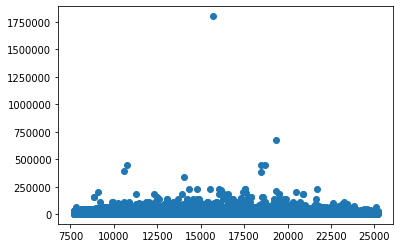

In [95]:
plt.scatter(train_set['Age_Days'],train_set['Client_Income'])

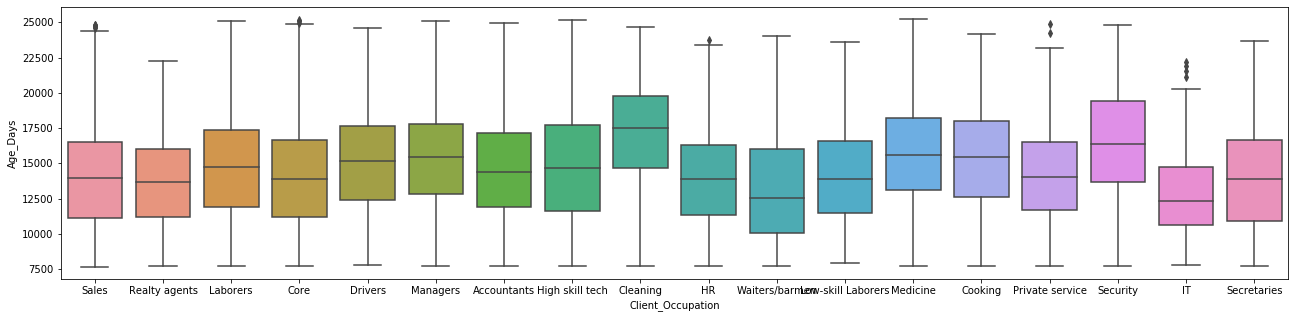

In [96]:
plt.figure(figsize=(22,5))
sns.boxplot(train_set['Client_Occupation'],train_set['Age_Days'])

In [97]:
train_set= train_set.drop(['Client_Occupation','Population_Region_Relative'],axis=1)

In [98]:
train_set

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Score_Source_2,Score_Source_3,Phone_Change,Credit_Bureau,Default
0,12142509,6750.0,0,0,1,0,0,61190.55,3416.85,Alone,...,2,6.0,17.000000,Yes,Yes,0.478787,0.000000,63.000000,1.891078,0
1,12138936,20250.0,1,0,1,0,0,15282.00,1826.55,Alone,...,2,3.0,10.000000,Yes,Yes,0.215068,0.000000,962.152007,1.891078,0
2,12181264,18000.0,0,0,1,0,1,59527.35,2788.20,Alone,...,2,4.0,12.063099,Yes,Yes,0.552795,0.329655,277.000000,0.000000,0
3,12188929,15750.0,0,0,1,1,0,53870.40,2295.45,Alone,...,3,2.0,15.000000,Yes,Yes,0.135182,0.631355,1700.000000,3.000000,0
4,12133385,33750.0,1,0,1,0,2,133988.40,3547.35,Alone,...,1,3.0,12.063099,Yes,Yes,0.301182,0.355639,674.000000,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121851,12207714,29250.0,0,0,0,1,0,107820.00,3165.30,Relative,...,2,4.0,16.000000,Yes,No,0.173527,0.184116,0.000000,1.000000,1
121852,12173765,15750.0,0,1,1,0,0,104256.00,3388.05,Alone,...,3,4.0,12.000000,Yes,Yes,0.371559,0.406617,4.000000,0.000000,0
121853,12103937,8100.0,0,1,0,1,1,55107.90,2989.35,Alone,...,3,5.0,11.000000,No,No,0.048079,0.000000,0.000000,1.891078,0
121854,12170623,38250.0,1,1,0,1,0,45000.00,2719.35,Alone,...,2,1.0,12.000000,Yes,Yes,0.103538,0.077499,0.000000,2.000000,0


In [99]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121842 entries, 0 to 121855
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121842 non-null  int64  
 1   Client_Income               121842 non-null  float64
 2   Car_Owned                   121842 non-null  object 
 3   Bike_Owned                  121842 non-null  object 
 4   Active_Loan                 121842 non-null  object 
 5   House_Own                   121842 non-null  object 
 6   Child_Count                 121842 non-null  object 
 7   Credit_Amount               121842 non-null  float64
 8   Loan_Annuity                121842 non-null  float64
 9   Accompany_Client            121842 non-null  object 
 10  Client_Income_Type          121842 non-null  object 
 11  Client_Education            121842 non-null  object 
 12  Client_Marital_Status       121842 non-null  object 
 13  Client_Gender 

In [100]:
train_set[['Car_Owned','Bike_Owned','Active_Loan','House_Own','Child_Count']]=train_set[['Car_Owned','Bike_Owned','Active_Loan','House_Own','Child_Count']].astype('int')

In [101]:
train_set['Default'].value_counts()

0    111997
1      9845
Name: Default, dtype: int64

In [102]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

In [103]:
df1= pd.get_dummies(train_set,drop_first=True)

In [104]:
df1.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Age_Days,...,Loan_Contract_Type_RL,Loan_Contract_Type_nan,Client_Housing_Type_Home,Client_Housing_Type_Municipal,Client_Housing_Type_Office,Client_Housing_Type_Rental,Client_Housing_Type_Shared,Client_Housing_Type_nan,Client_Permanent_Match_Tag_Yes,Client_Contact_Work_Tag_Yes
0,12142509,6750.0,0,0,1,0,0,61190.55,3416.85,13957.0,...,0,0,1,0,0,0,0,0,1,1
1,12138936,20250.0,1,0,1,0,0,15282.00,1826.55,14162.0,...,0,0,1,0,0,0,0,0,1,1
2,12181264,18000.0,0,0,1,0,1,59527.35,2788.20,16790.0,...,0,0,0,0,0,0,0,0,1,1
3,12188929,15750.0,0,0,1,1,0,53870.40,2295.45,23195.0,...,0,0,1,0,0,0,0,0,1,1
4,12133385,33750.0,1,0,1,0,2,133988.40,3547.35,11366.0,...,0,0,1,0,0,0,0,0,1,1


In [ ]:
df1.columns

In [ ]:
df1

In [105]:
train_set['Loan_Contract_Type'].value_counts()

CL     107107
RL      11084
nan      3651
Name: Loan_Contract_Type, dtype: int64

In [106]:
train_set['Loan_Contract_Type']= train_set['Loan_Contract_Type'].replace('nan','CL')

In [107]:
train_set['Client_Marital_Status'].value_counts()

M      87340
S      17403
D       7554
W       6074
nan     3471
Name: Client_Marital_Status, dtype: int64

In [108]:
train_set['Client_Marital_Status']= train_set['Client_Marital_Status'].replace('nan','M')

In [109]:
for i in df1.columns:
    print(df1[df1[i]=='Yes'])

Empty DataFrame
Columns: [ID, Client_Income, Car_Owned, Bike_Owned, Active_Loan, House_Own, Child_Count, Credit_Amount, Loan_Annuity, Age_Days, Employed_Days, Registration_Days, ID_Days, Mobile_Tag, Homephone_Tag, Workphone_Working, Client_Family_Members, Cleint_City_Rating, Application_Process_Day, Application_Process_Hour, Score_Source_2, Score_Source_3, Phone_Change, Credit_Bureau, Default, Accompany_Client_Group, Accompany_Client_Kids, Accompany_Client_Others, Accompany_Client_Partner, Accompany_Client_Relative, Accompany_Client_nan, Client_Income_Type_Commercial, Client_Income_Type_Govt Job, Client_Income_Type_Maternity leave, Client_Income_Type_Retired, Client_Income_Type_Service, Client_Income_Type_Student, Client_Income_Type_Unemployed, Client_Income_Type_nan, Client_Education_Graduation dropout, Client_Education_Junior secondary, Client_Education_Post Grad, Client_Education_Secondary, Client_Education_nan, Client_Marital_Status_M, Client_Marital_Status_S, Client_Marital_Status

Empty DataFrame
Columns: [ID, Client_Income, Car_Owned, Bike_Owned, Active_Loan, House_Own, Child_Count, Credit_Amount, Loan_Annuity, Age_Days, Employed_Days, Registration_Days, ID_Days, Mobile_Tag, Homephone_Tag, Workphone_Working, Client_Family_Members, Cleint_City_Rating, Application_Process_Day, Application_Process_Hour, Score_Source_2, Score_Source_3, Phone_Change, Credit_Bureau, Default, Accompany_Client_Group, Accompany_Client_Kids, Accompany_Client_Others, Accompany_Client_Partner, Accompany_Client_Relative, Accompany_Client_nan, Client_Income_Type_Commercial, Client_Income_Type_Govt Job, Client_Income_Type_Maternity leave, Client_Income_Type_Retired, Client_Income_Type_Service, Client_Income_Type_Student, Client_Income_Type_Unemployed, Client_Income_Type_nan, Client_Education_Graduation dropout, Client_Education_Junior secondary, Client_Education_Post Grad, Client_Education_Secondary, Client_Education_nan, Client_Marital_Status_M, Client_Marital_Status_S, Client_Marital_Status

In [110]:
train_set['Accompany_Client']= train_set['Accompany_Client'].replace('nan','Alone')

In [111]:
train_set['Client_Income_Type'].value_counts()

Service            61021
Commercial         27761
Retired            21041
Govt Job            8302
nan                 3700
Student                8
Unemployed             6
Maternity leave        2
Businessman            1
Name: Client_Income_Type, dtype: int64

In [112]:
train_set['Client_Income_Type']= train_set['Client_Income_Type'].replace('nan','Service')

In [113]:
train_set['Accompany_Client'].value_counts()

Alone       99156
Relative    15746
Partner      4515
Kids         1334
Others        987
Group         104
Name: Accompany_Client, dtype: int64

In [114]:
train_set['Accompany_Client']= train_set['Accompany_Client'].replace('nan','Alone')

In [115]:
train_set['Client_Education'].value_counts()

Secondary             83902
Graduation            28817
Graduation dropout     3959
nan                    3643
Junior secondary       1455
Post Grad                66
Name: Client_Education, dtype: int64

In [116]:
train_set['Client_Education']=train_set['Client_Education'].replace('nan','Secondary')

In [117]:
train_set['Client_Housing_Type'].value_counts()

Home         104857
Family         5783
Municipal      4248
nan            3687
Rental         1815
Office         1002
Shared          450
Name: Client_Housing_Type, dtype: int64

In [118]:
train_set['Client_Housing_Type']=train_set['Client_Housing_Type'].replace('nan','Home')

In [119]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121842 entries, 0 to 121855
Data columns (total 60 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ID                                   121842 non-null  int64  
 1   Client_Income                        121842 non-null  float64
 2   Car_Owned                            121842 non-null  int32  
 3   Bike_Owned                           121842 non-null  int32  
 4   Active_Loan                          121842 non-null  int32  
 5   House_Own                            121842 non-null  int32  
 6   Child_Count                          121842 non-null  int32  
 7   Credit_Amount                        121842 non-null  float64
 8   Loan_Annuity                         121842 non-null  float64
 9   Age_Days                             121842 non-null  float64
 10  Employed_Days                        121842 non-null  float64
 11  Registration_

In [120]:
x= df1.drop('Default',axis=1)
y= df1['Default']

In [121]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=42)

In [122]:
mod=lr.fit(xtrain,ytrain)


In [123]:
ypred=mod.predict(xtest)

In [124]:
from sklearn.metrics import f1_score,classification_report
print(f1_score(ytest,ypred))
print(classification_report(ytest,ypred))

0.0
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     33625
           1       0.00      0.00      0.00      2928

    accuracy                           0.92     36553
   macro avg       0.46      0.50      0.48     36553
weighted avg       0.85      0.92      0.88     36553



## Conclusion

Data Cleansing was done, The null values in numerical columns were imputed with mean value and categorical columns were treated
with mode. The data now we have is ready to build a base model.
Further Improvements:
    Outlier datas can be observed and can be treated
    The ouput column is imbalanced hence we can adopt SMOTE to balance the data and the bias can be removed
    After adopting these we can build advanced models like Random Forest,Xgboost to improve the performance
    Hypermater optimization can be done to improve model performance